In [1]:
#importing Libraries
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data.csv'
data = pd.read_csv(file_to_load)

In [3]:
#Getting the columns needed for the analysis
cleanedData = data.loc[:, ['Reported_Date', 'Description']]

In [4]:
#Converting reported date field to type datetime
cleanedData['Reported_Date'] = pd.to_datetime(cleanedData['Reported_Date'], errors='coerce')

# Total Number of Crimes by Month

In [5]:
#Getting the total number of crimes that took place in each month,
#got the code from https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
totalByMonth = cleanedData.groupby(cleanedData['Reported_Date'].dt.strftime('%B'))['Reported_Date'].count()
totalByMonth

Reported_Date
April        10418
August       11746
December      9417
February      8877
January      10191
July         11489
June         11487
March        10796
May          11693
November      9955
October      11990
September    10879
Name: Reported_Date, dtype: int64

In [6]:
#Converting the series to a dataframe to make user friendly to work with
totalByMonth_df = pd.DataFrame(totalByMonth)

In [7]:
#sorting the dataframe to list the results in sorted manner,
#got the code from https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
         'November', 'December']
totalByMonth_df.index = pd.CategoricalIndex(totalByMonth_df.index, categories=months, ordered=True)
totalByMonth_df = totalByMonth_df.sort_index()

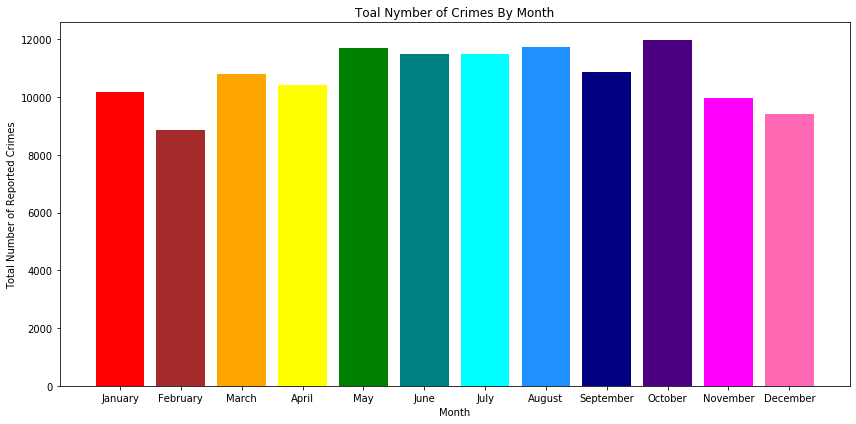

In [8]:
#Creating the plot to represent the data
colors =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'navy', 'indigo', 'magenta','hotpink']
fig, ax = plt.subplots(figsize=(12,6))
totalCrimes = plt.bar(x = totalByMonth_df.index, height= totalByMonth_df['Reported_Date'], color=colors)
plt.title("Toal Nymber of Crimes By Month")
plt.xlabel('Month')
plt.ylabel('Total Number of Reported Crimes')
plt.tight_layout()
plt.show()

# Types of Crimes by Month

In [77]:
copy = cleanedData
copy['Reported_Date'] = pd.to_datetime(copy['Reported_Date'], errors='coerce')
copy['Month'] =  copy['Reported_Date'].dt.strftime('%B')
copy = copy.replace({'Agg Assault - Domest': 'Aggravated Assault', 'Aggravated Assault (': 'Aggravated Assault', 'Agg Assault': 'Aggravated Assault', 'agg assault': 'Aggravated Assault',
                     'AGG ASSAULT': 'Aggravated Assault', 'Agg Assault - Drive-': 'Aggravated Assault', 'Arson with Fire Bomb': 'Arson', 'Attempt Suicide by D': 'Suicide',
                     'Attempt Suicide by G': 'Suicide', 'Attempt Suicide by H': 'Suicide', 'Attempt Suicide by J': 'Suicide', 'Attempt Suicide by O': 'Suicide', 'Attempt Suicide by P': 'Suicide',
                     'Attempt Suicide by S': 'Suicide', 'Suicide By Hanging': 'Suicide', 'Suicide By Jumping': 'Suicide', 'Suicide By Shooting': 'Suicide', 'Suicide By Sleeping': 'Suicide', 
                     'Suicide by Other Mea': 'Suicide', 'Attempt Suicide by C': 'Suicide','Forged Checks': 'Forgery', 'Fraud/Confidence Gam': 'Forgery', 'Gambling - Possessio': 'Forgery',
                     'Stealing All Other': 'Stealing', 'Stealing Auto Parts': 'Stealing', 'Stealing Auto Parts/': 'Stealing', 'Stealing Bicycles': 'Stealing', 'Stealing Coin Operat': 'Stealing', 
                     'Stealing From Auto': 'Stealing', 'Stealing Pickpocket': 'Stealing', 'Stealing Purse Snatc': 'Stealing', 'Stealing Shoplifting': 'Stealing', 'Stealing from Buildi': 'Stealing',
                     'Stolen Property OFFE': 'Stealing', 'stealing': 'Stealing', 'stealing from buildi': 'Stealing'})
copy

,Reported_Date,Description,Month
0,2018-09-02,Burglary - Residence,September
1,2018-01-31,Forgery,January
2,2018-01-30,Sex Off Fondle - mol,January
3,2018-01-30,Burglary - Residence,January
4,2018-12-08,Property Damage,December
...,...,...,...
128933,2018-12-23,HOMICIDE/Non Neglige,December
128934,2018-12-27,Stealing,December
128935,2018-12-29,Burglary - Residence,December
128936,2018-12-25,Non Agg Assault Dome,December


In [78]:
typesofCrime = copy.groupby(['Month','Description'])['Reported_Date'].count()
typesofCrime

Month      Description         
April      Aggravated Assault       891
           Armed Robbery            193
           Arson                     48
           Auto Theft               655
           Auto Theft Outside S      64
           Bomb Threat/Intimida      10
           Bribery                    2
           Burglary - Non Resid     212
           Burglary - Residence     502
           Counterfeiting             4
           Credit/Debit/ATM Car      96
           Dead Body                  6
           Disorderly Conduct       160
           Driving Under Influe      79
           Embezzlement              36
           False Information to      44
           Family Disturbance         2
           Family Offense            48
           Forcible Sodomy           35
           Forgery                  224
           HOMICIDE/Non Neglige      28
           Hacking/Computer Inv       4
           Hit and Run of a Per       5
           Human Trafficking/Co       4
        

In [79]:
crime = pd.DataFrame(typesofCrime).reset_index()
crime

,Month,Description,Reported_Date
0,April,Aggravated Assault,891
1,April,Armed Robbery,193
2,April,Arson,48
3,April,Auto Theft,655
4,April,Auto Theft Outside S,64
5,April,Bomb Threat/Intimida,10
6,April,Bribery,2
7,April,Burglary - Non Resid,212
8,April,Burglary - Residence,502
9,April,Counterfeiting,4


In [80]:
crime = crime.pivot(index='Month', columns='Description', values='Reported_Date')
crime

Description,Accidental Drug Over,Aggravated Assault,Animal Bite - Dog,Animal Cruelty,Armed Robbery,Arson,Auto Theft,Auto Theft Outside S,Bomb Threat/Intimida,Bombing (other than,...,Withhold Property,`,black mail,forgery,misc,misc violation,non aggravated assau,property damage,stealing,stealing from buildi
Month,,,,,,,,,,,,,,,,,,,,,
April,NaN,891.0,NaN,NaN,193.0,48.0,655.0,64.0,10.0,NaN,...,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
August,3.0,916.0,NaN,NaN,386.0,49.0,819.0,94.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN
December,NaN,741.0,NaN,NaN,248.0,25.0,609.0,65.0,19.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,NaN,617.0,NaN,NaN,183.0,35.0,725.0,109.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN
January,NaN,839.0,NaN,2.0,376.0,70.0,862.0,136.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
July,NaN,951.0,NaN,NaN,299.0,45.0,784.0,64.0,8.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
June,NaN,1072.0,1.0,5.0,233.0,36.0,753.0,95.0,17.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March,NaN,851.0,NaN,1.0,274.0,36.0,791.0,78.0,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
May,NaN,947.0,NaN,NaN,221.0,33.0,822.0,97.0,18.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
crime.columns.values

array(['Accidental Drug Over', 'Aggravated Assault', 'Animal Bite - Dog',
       'Animal Cruelty', 'Armed Robbery', 'Arson', 'Auto Theft',
       'Auto Theft Outside S', 'Bomb Threat/Intimida',
       'Bombing (other than', 'Bribery', 'Burglary - Non Resid',
       'Burglary - Residence', 'Business Robbery', 'Casualty (includes a',
       'Counterfeiting', 'Credit/Debit/ATM Car', 'Curfew', 'Dead Body',
       'Disorderly Conduct', 'Driving Under Influe', 'Drunkenness',
       'Dumping (littering)', 'Embezzlement', 'Extortion/Blackmail',
       'Failure to Return', 'False ID', 'False Information to',
       'Family Disturbance', 'Family Offense', 'Forcible Fondling',
       'Forcible Sodomy', 'Forgery', 'HOMICIDE/Non Neglige',
       'Hacking/Computer Inv', 'Hit and Run of a Per',
       'Human Trafficking/Co', 'Identity Theft', 'Impersonation - NOT',
       'Interference with Cu', 'Intimidation', 'Justifiable Homicide',
       'Kidnapping/Abduction', 'Liquor Law Violaton', 'Loitering',

In [ ]:
# month = crime['Month']
# for num, month in enumerate(month):
#     values = list(crime[crime['Month'] == month].loc[:, 'Value'])

#     crime[crime['Month'] == month].plot.bar(x=crime['Description'],y=crime['Reported_Date'], ax=ax, stacked=True, 
#                                     bottom = margin_bottom, color=colors[num], label=month)
#     margin_bottom += values
# plt.show()

In [ ]:
types = [ 'Agg Assault - Domest', 'Aggravated Assault (', 'Armed Robbery', 'Auto Theft', 'Burglary - Non Resid', 'Burglary - Residence', 'Disorderly Conduct', 'Driving Under Influe',  'Fraud/Confidence Gam', 'Identity Theft', 'Intimidation', 'Kidnapping/Abduction', 'Liquor Law Violaton', 'Non Agg Assault Dome', 'Non Aggravated Assau', 'Possession/Sale/Dist', 'Property Damage', 'Sex Off Fondle - mol', 'Stealing All Other', 'Stealing Auto Parts/', 'Stealing From Auto', 'Stealing Shoplifting', 'Stealing from Buildi', 'Trespassing', 'Violation Full Order', 'Weapons Law Violatio']
crime.plot.bar(stacked=True, figsize=(10,8))
plt.show()